# Random Forest

In [1]:
#Import dependenices
import csv
import pandas as pd
from pathlib import Path
import hvplot.pandas
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow as tfm
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from pathlib import Path
from sklearn import tree
%matplotlib inline

2024-01-03 23:56:19.346046: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Specify the path to your CSV file
csv_file_path1 = '../Resources/Clean_test_scaled.csv'
csv_file_path2 = '../Resources/Clean_train_scaled.csv'

# Read the CSV file into a DataFrame
test_df = pd.read_csv(csv_file_path1)
train_df = pd.read_csv(csv_file_path2)

test_df.dropna(inplace=True)
train_df.dropna(inplace=True)

#Print size of data set
print(test_df.shape)
print(train_df.shape)

# Display the DataFrame
train_df.head(5)

(65072, 15)
(6397, 15)


,Current loan amount,Credit score,Annual income,Monthly debt,Years of credit history,Number of open accounts,Number of credit problems,Current credit balance,Maximum open credit,Long term,Short term,Home mortgage,Own home,Rent,Bankrupt
0,-0.396710,-0.224366,0.810185,1.930978,0.519773,-0.416087,-0.332426,0.868213,0.402694,0,1,1,0,0,0
1,-0.406640,-0.233156,0.631936,1.489873,0.174878,-0.016795,-0.332426,1.019424,0.247734,0,1,1,0,0,0
2,-0.409901,-0.250059,-0.573923,-0.826455,-0.816695,-0.216441,-0.332426,-0.661535,-0.270115,0,1,0,0,1,0
3,-0.409245,-0.237888,-0.678656,-0.138913,-0.241870,0.981434,1.676190,-0.351042,-0.126429,0,1,0,0,1,1
4,-0.405046,-0.226394,0.450102,1.724058,1.123338,0.582142,-0.332426,0.180813,-0.189855,0,1,1,0,0,0


In [3]:
# Define features set
X_train = train_df.copy()
X_train.drop("Bankrupt", axis=1, inplace=True)

X_test = test_df.copy()
X_test.drop("Bankrupt", axis=1, inplace=True)

In [4]:
# Define target vector
y_train = train_df['Bankrupt'].ravel()
y_test = test_df['Bankrupt'].ravel()

In [5]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [6]:
# Fitting the model
model = model.fit(X_train, y_train)

In [7]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=600, random_state=78)

In [8]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [9]:
# Making predictions uisng the testing data
predictions = rf_model.predict(X_test)

In [10]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [11]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,57813,4
Actual 1,7255,0


Accuracy Score : 0.8884466437177281
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     57817
           1       0.00      0.00      0.00      7255

    accuracy                           0.89     65072
   macro avg       0.44      0.50      0.47     65072
weighted avg       0.79      0.89      0.84     65072



In [12]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)

[(0.1287628059806317, 'Annual income'),
 (0.12827749969577837, 'Monthly debt'),
 (0.12714609259912663, 'Current credit balance'),
 (0.12500867878970057, 'Maximum open credit'),
 (0.11930344159015953, 'Years of credit history'),
 (0.11521581208863461, 'Current loan amount'),
 (0.11064676404356741, 'Credit score'),
 (0.08037942670303642, 'Number of open accounts'),
 (0.015418209292515975, 'Number of credit problems'),
 (0.012960955172172849, 'Rent'),
 (0.01229376959721134, 'Home mortgage'),
 (0.008565798121095437, 'Short term'),
 (0.008452435726245681, 'Long term'),
 (0.0075683106001236825, 'Own home')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

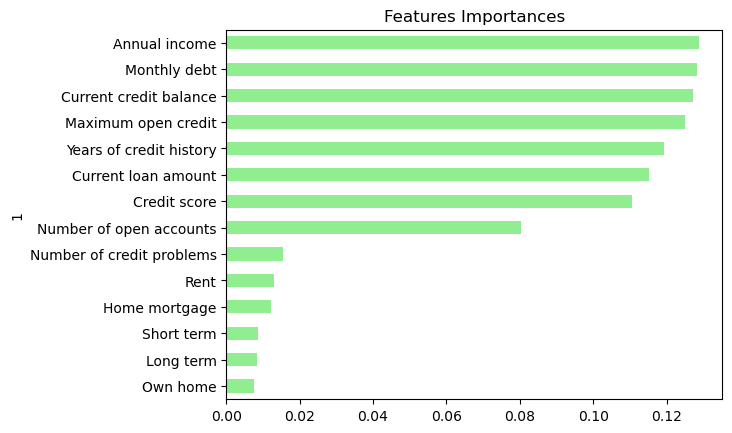

In [13]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

# Random Forest Optimisation

### Number of trees (n_estimaters)

In [14]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=3000, random_state=78)

In [15]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [16]:
# Making predictions uisng the testing data
predictions = rf_model.predict(X_test)

In [17]:
# Calculating the confusion matrix
cm1 = confusion_matrix(y_test, predictions)
cm_df1 = pd.DataFrame(
    cm1, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score1 = accuracy_score(y_test, predictions)

In [18]:
# Displaying results
print("Confusion Matrix")
display(cm_df1)
print(f"Accuracy Score : {acc_score1}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,57812,5
Actual 1,7255,0


Accuracy Score : 0.8884312761249078
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     57817
           1       0.00      0.00      0.00      7255

    accuracy                           0.89     65072
   macro avg       0.44      0.50      0.47     65072
weighted avg       0.79      0.89      0.84     65072



In [19]:
# Outcome
print(f'Orginal score: {acc_score}')
print(f'Optimised score: {acc_score1}')

Orginal score: 0.8884466437177281
Optimised score: 0.8884312761249078


# Class weight adjustment

In [20]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=3000, class_weight = 'balanced', random_state=78)

In [21]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [22]:
# Making predictions uisng the testing data
predictions = rf_model.predict(X_test)

In [23]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score3 = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,57817,0
Actual 1,7255,0


Accuracy Score : 0.8884466437177281
Classification Report
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     57817
           1       0.00      0.00      0.00      7255

    accuracy                           0.89     65072
   macro avg       0.44      0.50      0.47     65072
weighted avg       0.79      0.89      0.84     65072



/Users/kavishnaran/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kavishnaran/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kavishnaran/anaconda3/envs/PythonData/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera